In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/hate-speech-and-offensive-language-dataset/labeled_data.csv


In [2]:
import pandas as pd;


In [3]:
file_path =  "/kaggle/input/hate-speech-and-offensive-language-dataset/labeled_data.csv"
df = pd.read_csv(file_path)


In [4]:
df.head()

,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet
0,0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...


In [5]:
df.columns


Index(['Unnamed: 0', 'count', 'hate_speech', 'offensive_language', 'neither',
       'class', 'tweet'],
      dtype='object')

In [6]:
df.drop(columns=['Unnamed: 0', 'count', 'hate_speech', 'offensive_language', 'neither'], inplace = True)

In [7]:
df.head()

,class,tweet
0,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...


In [8]:
df.isna().sum()

class    0
tweet    0
dtype: int64

In [9]:
df['tweet'].iloc[100]

'"@ClicquotSuave: LMAOOOOOOOOOOO this nigga @Krillz_Nuh_Care http://t.co/AAnpSUjmYI" &lt;bitch want likes for some depressing shit..foh'

In [10]:
df['processed_tweet'] = df['tweet'].str.replace(r'[^a-zA-Z]',' ',regex =True)

In [11]:
df.head()

,class,tweet,processed_tweet
0,2,!!! RT @mayasolovely: As a woman you shouldn't...,RT mayasolovely As a woman you shouldn t...
1,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...,RT mleew boy dats cold tyga dwn ba...
2,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...,RT UrKindOfBrand Dawg RT sbaby...
3,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...,RT C G Anderson viva based she lo...
4,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...,RT ShenikaRoberts The shit you...


In [12]:
print(df['tweet'].iloc[100])
print(df['processed_tweet'].iloc[100])

"@ClicquotSuave: LMAOOOOOOOOOOO this nigga @Krillz_Nuh_Care http://t.co/AAnpSUjmYI" &lt;bitch want likes for some depressing shit..foh
  ClicquotSuave  LMAOOOOOOOOOOO this nigga  Krillz Nuh Care http   t co AAnpSUjmYI   lt bitch want likes for some depressing shit  foh


In [13]:
df['processed_tweet_2'] = df['processed_tweet'].str.replace(r'[\s]+',' ',regex = True)

In [14]:
df.head()

,class,tweet,processed_tweet,processed_tweet_2
0,2,!!! RT @mayasolovely: As a woman you shouldn't...,RT mayasolovely As a woman you shouldn t...,RT mayasolovely As a woman you shouldn t comp...
1,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...,RT mleew boy dats cold tyga dwn ba...,RT mleew boy dats cold tyga dwn bad for cuffi...
2,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...,RT UrKindOfBrand Dawg RT sbaby...,RT UrKindOfBrand Dawg RT sbaby life You ever ...
3,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...,RT C G Anderson viva based she lo...,RT C G Anderson viva based she look like a tr...
4,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...,RT ShenikaRoberts The shit you...,RT ShenikaRoberts The shit you hear about me ...


In [15]:
df.drop(columns=['tweet','processed_tweet'],inplace= True)

In [16]:
import spacy
nlp = spacy.load('en_core_web_sm')

In [17]:
#LEMMETISATION
def lemmetize_text(text):
    doc = nlp(text)
    lemma = [word.lemma_ for word in doc]
    return ' '.join(lemma)


In [18]:
 df['lemma_tweet'] = df['processed_tweet_2'].apply(lemmetize_text)

In [19]:
df.head()

,class,processed_tweet_2,lemma_tweet
0,2,RT mayasolovely As a woman you shouldn t comp...,RT mayasolovely as a woman you shouldn t com...
1,1,RT mleew boy dats cold tyga dwn bad for cuffi...,RT mleew boy dat cold tyga dwn bad for cuffi...
2,1,RT UrKindOfBrand Dawg RT sbaby life You ever ...,RT UrKindOfBrand Dawg RT sbaby life you ever...
3,1,RT C G Anderson viva based she look like a tr...,RT C G Anderson viva base she look like a tr...
4,1,RT ShenikaRoberts The shit you hear about me ...,RT ShenikaRoberts the shit you hear about I ...


In [20]:
#remove stopwords
def remove_stopwords(text):
    doc = nlp(text)
    stopwords_removed_list = [word.text for word in doc if not word.is_stop]
    return ' '.join(stopwords_removed_list)



In [21]:
df['final_tweet'] = df['lemma_tweet'].apply(remove_stopwords)

In [22]:
from tensorflow.keras.preprocessing.text import one_hot
vocab_size = 10000

one_hot_representation = [one_hot(words,vocab_size) for words in df['final_tweet']]

In [23]:
for i in range(0,4):
    print(one_hot_representation[i])

[6564, 8738, 8820, 7029, 5445, 2411, 841, 905, 7565, 2769, 289]
[6564, 8340, 9395, 8162, 1536, 2711, 7668, 6490, 8932, 8162, 1746, 4885, 8547]
[6564, 8222, 2872, 6564, 3886, 2473, 2832, 9430, 8393, 1131, 1671, 3989]
[6564, 5152, 4256, 2582, 6072, 5121, 9028, 5945, 5635]


In [24]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Define a desired sequence length
sentence_length = 30

# One-hot representations of your input text (example)


# Pad sequences
padded_tweet = pad_sequences(one_hot_representation, padding='pre', maxlen=sentence_length)

# Output the padded sequences
print(padded_tweet)


[[   0    0    0 ... 7565 2769  289]
 [   0    0    0 ... 1746 4885 8547]
 [   0    0    0 ... 1131 1671 3989]
 ...
 [   0    0    0 ... 5945 3120 7508]
 [   0    0    0 ... 9430 3003 4892]
 [   0    0    0 ...  279 7729 2596]]


In [25]:
import numpy as np;

X = np.array(padded_tweet)
y = np.array(df['class'])

In [26]:
df['class'].value_counts()

class
1    19190
2     4163
0     1430
Name: count, dtype: int64

In [27]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(sampling_strategy = 'minority')
X,y =smote.fit_resample(X,y)

In [28]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state=69)


In [29]:
X_train.shape,X_test.shape

((34034, 30), (8509, 30))

In [30]:
import tensorflow as tf
from tensorflow import keras

# Define model parameters
dimension = 50

# Define the Sequential model
model = keras.Sequential([
    keras.layers.Embedding(vocab_size, dimension, input_length=sentence_length),  
    keras.layers.LSTM(100, return_sequences=True),
    keras.layers.LSTM(100, return_sequences=True),  
    keras.layers.LSTM(50),                         
    keras.layers.Dense(3, activation='softmax')    
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy']) 


/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [31]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [32]:
model.fit(X_train,y_train,epochs = 10,batch_size = 32)

Epoch 1/10
1064/1064 ━━━━━━━━━━━━━━━━━━━━ 67s 58ms/step - accuracy: 0.7900 - loss: 0.4886
Epoch 2/10
1064/1064 ━━━━━━━━━━━━━━━━━━━━ 62s 58ms/step - accuracy: 0.9444 - loss: 0.1729
Epoch 3/10
1064/1064 ━━━━━━━━━━━━━━━━━━━━ 61s 57ms/step - accuracy: 0.9619 - loss: 0.1180
Epoch 4/10
1064/1064 ━━━━━━━━━━━━━━━━━━━━ 61s 57ms/step - accuracy: 0.9725 - loss: 0.0908
Epoch 5/10
1064/1064 ━━━━━━━━━━━━━━━━━━━━ 61s 58ms/step - accuracy: 0.9781 - loss: 0.0704
Epoch 6/10
1064/1064 ━━━━━━━━━━━━━━━━━━━━ 62s 58ms/step - accuracy: 0.9828 - loss: 0.0557
Epoch 7/10
1064/1064 ━━━━━━━━━━━━━━━━━━━━ 61s 57ms/step - accuracy: 0.9879 - loss: 0.0386
Epoch 8/10
1064/1064 ━━━━━━━━━━━━━━━━━━━━ 61s 58ms/step - accuracy: 0.9922 - loss: 0.0249
Epoch 9/10
1064/1064 ━━━━━━━━━━━━━━━━━━━━ 61s 58ms/step - accuracy: 0.9921 - loss: 0.0240
Epoch 10/10
1064/1064 ━━━━━━━━━━━━━━━━━━━━ 61s 58ms/step - accuracy: 0.9937 - loss: 0.0170


In [33]:
loss, accuracy = model.evaluate(X_test,y_test)
print(f'Model Accuracy : {accuracy}')

266/266 ━━━━━━━━━━━━━━━━━━━━ 6s 20ms/step - accuracy: 0.8892 - loss: 0.5768
Model Accuracy : 0.8880009651184082


In [34]:
pred  = np.argmax(model.predict(X_test),axis = -1)

266/266 ━━━━━━━━━━━━━━━━━━━━ 6s 22ms/step


In [35]:
y_test[:30]

array([2, 0, 1, 0, 1, 0, 2, 2, 1, 2, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1,
       1, 1, 2, 0, 1, 0, 0, 0])

In [36]:
pred[:30]

array([2, 0, 1, 0, 1, 0, 1, 2, 1, 2, 1, 1, 0, 2, 0, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 2, 0, 1, 0, 0, 0])

In [37]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.90      0.91      0.90      3869
           1       0.92      0.89      0.90      3815
           2       0.73      0.74      0.74       825

    accuracy                           0.89      8509
   macro avg       0.85      0.85      0.85      8509
weighted avg       0.89      0.89      0.89      8509



Text(50.722222222222214, 0.5, 'actual')

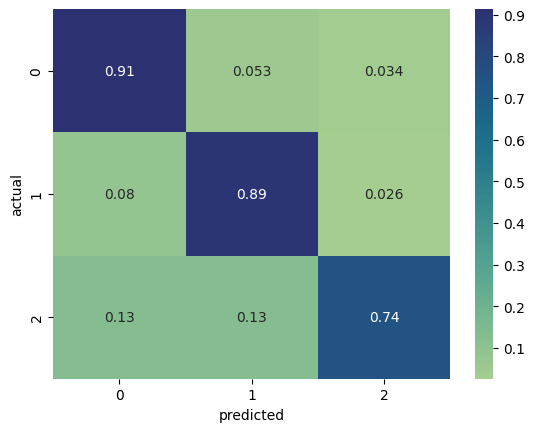

In [38]:
import matplotlib.pyplot as plt;
cf = confusion_matrix(y_test,pred,normalize = 'true')
sns.heatmap(cf,annot = True,cmap= 'crest');
plt.xlabel('predicted')
plt.ylabel('actual')